### Step 1: Importing Required Libraries

We begin by importing necessary libraries for data manipulation, visualization, and warning handling. The dataset is then loaded into a pandas DataFrame.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("/Users/shauryadityasingh/Downloads/supply_chain_data.csv")
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


### Step 2: Initial Data Exploration

We inspect the dataset's shape, data types, and check for missing values or anomalies to understand the overall structure.

In [3]:
# Shape and info
print("Shape:", df.shape)
df.info()

# Missing values
df.isnull().sum()

# Summary stats
df.describe()

Shape: (100, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location  

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


### Step 3: Data Cleaning & Formatting

We standardize column names, convert categorical fields, and ensure numeric columns are correctly typed. This prepares the data for analysis.

In [4]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Convert categorical columns
cat_cols = ['product_type', 'customer_demographics', 'shipping_carriers', 
            'supplier_name', 'location', 'transportation_modes', 'routes']
for col in cat_cols:
    df[col] = df[col].astype('category')

# Ensure numeric columns are correct
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['revenue_generated'] = pd.to_numeric(df['revenue_generated'], errors='coerce')

# Check for duplicates
df.duplicated().sum()

0

### Step 4: Exploratory Analysis – Sales and Revenue Trends

We visualize key metrics like revenue distribution and sales volume by price to identify top-performing product types.

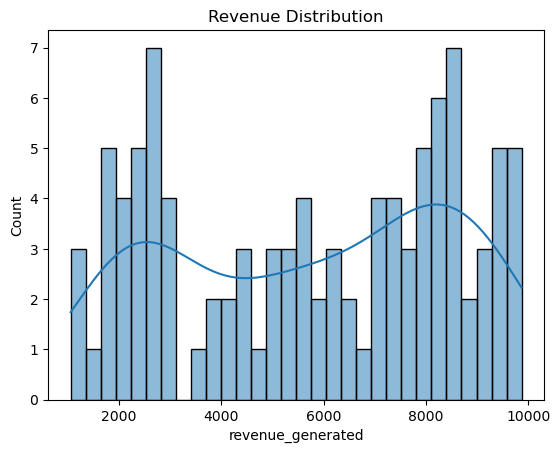

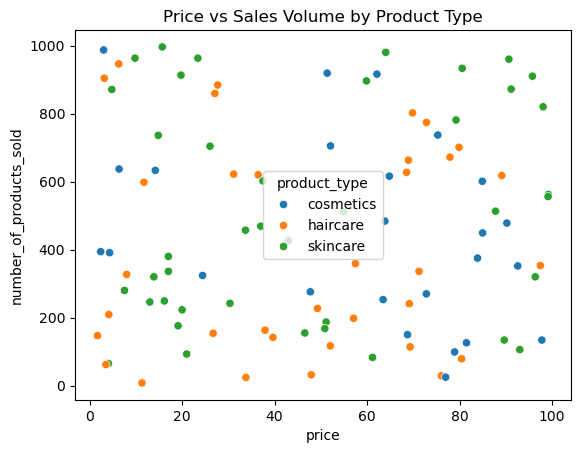

In [5]:
# Revenue distribution
sns.histplot(df['revenue_generated'], bins=30, kde=True)
plt.title('Revenue Distribution')
plt.show()

# Price vs Products Sold
sns.scatterplot(data=df, x='price', y='number_of_products_sold', hue='product_type')
plt.title('Price vs Sales Volume by Product Type')
plt.show()

### Step 5: Operational Insight – Shipping and Carrier Efficiency

Here, we explore cost efficiencies by visualizing shipping cost per unit by carrier, and the relationship between lead time and defect rate.

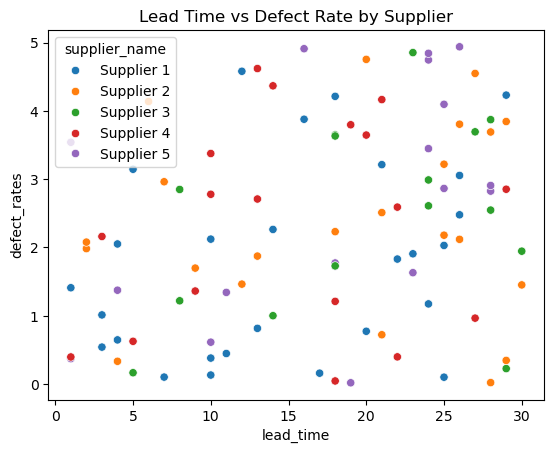

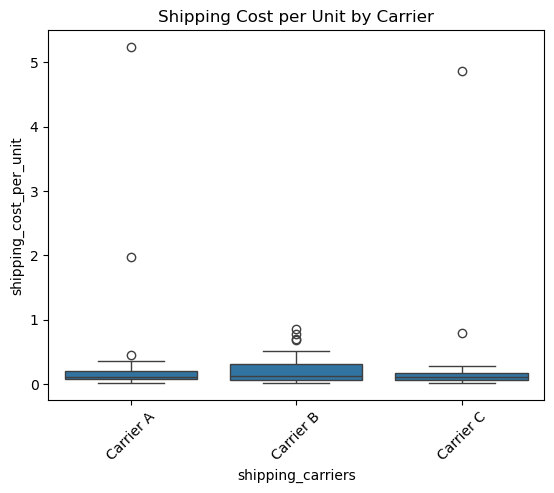

In [6]:
# Lead time vs Defect rate
sns.scatterplot(data=df, x='lead_time', y='defect_rates', hue='supplier_name')
plt.title('Lead Time vs Defect Rate by Supplier')
plt.show()

# Shipping cost per order
df['shipping_cost_per_unit'] = df['shipping_costs'] / df['order_quantities']
sns.boxplot(data=df, x='shipping_carriers', y='shipping_cost_per_unit')
plt.title('Shipping Cost per Unit by Carrier')
plt.xticks(rotation=45)
plt.show()

### Step 6: Production Analysis – Cost, Volume, and Quality

We assess the cost-efficiency of production and quality control across products by visualizing cost vs volume and defect rates per supplier.

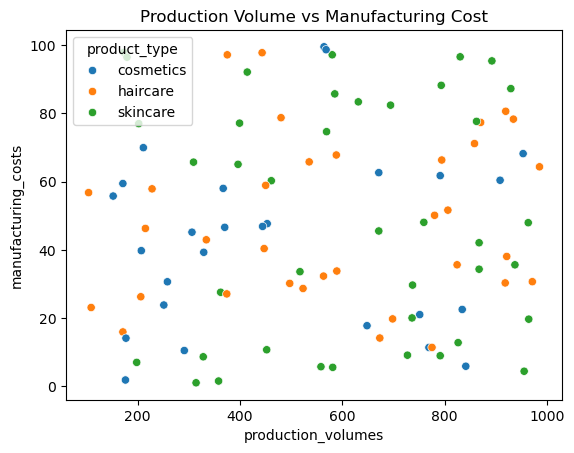

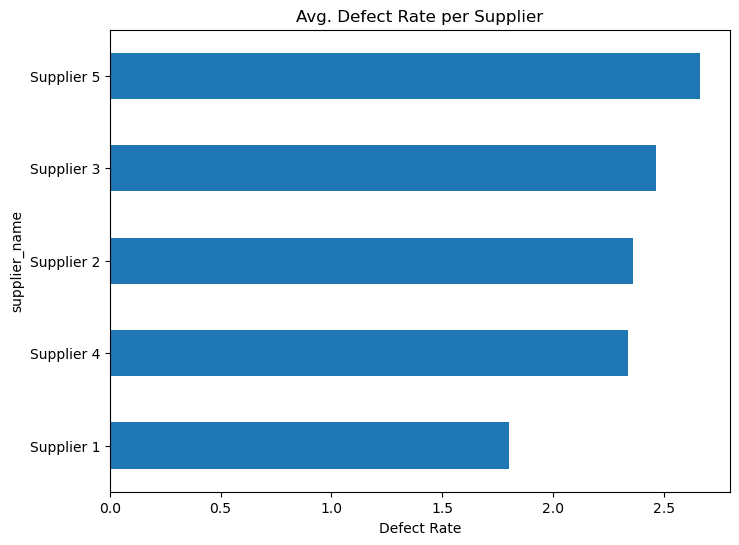

In [7]:
# Production volume vs Manufacturing cost
sns.scatterplot(data=df, x='production_volumes', y='manufacturing_costs', hue='product_type')
plt.title('Production Volume vs Manufacturing Cost')
plt.show()

# Average defect rate per supplier
supplier_defects = df.groupby('supplier_name')['defect_rates'].mean().sort_values()
supplier_defects.plot(kind='barh', figsize=(8,6), title='Avg. Defect Rate per Supplier')
plt.xlabel("Defect Rate")
plt.show()

### Step 7: Strategic Business Insights

We identify the top-performing SKUs, product lines with high margin, and evaluate suppliers with optimal lead time and quality.

In [8]:
# Top 5 SKUs by revenue
df.groupby('sku')['revenue_generated'].sum().sort_values(ascending=False).head()

# Which product type generates the highest avg revenue per unit?
df['revenue_per_unit'] = df['revenue_generated'] / df['number_of_products_sold']
df.groupby('product_type')['revenue_per_unit'].mean().sort_values(ascending=False)

# Identify top 3 suppliers with lowest defect rate and fastest lead time
df.groupby('supplier_name')[['defect_rates', 'lead_time']].mean().sort_values(by=['defect_rates', 'lead_time']).head(3)

,defect_rates,lead_time
supplier_name,,
Supplier 1,1.803630,14.777778
Supplier 4,2.337397,15.222222
Supplier 2,2.362750,18.545455


### Step 8: Correlation Matrix

To identify relationships between key numeric variables, we visualize a heatmap of correlations across the dataset.

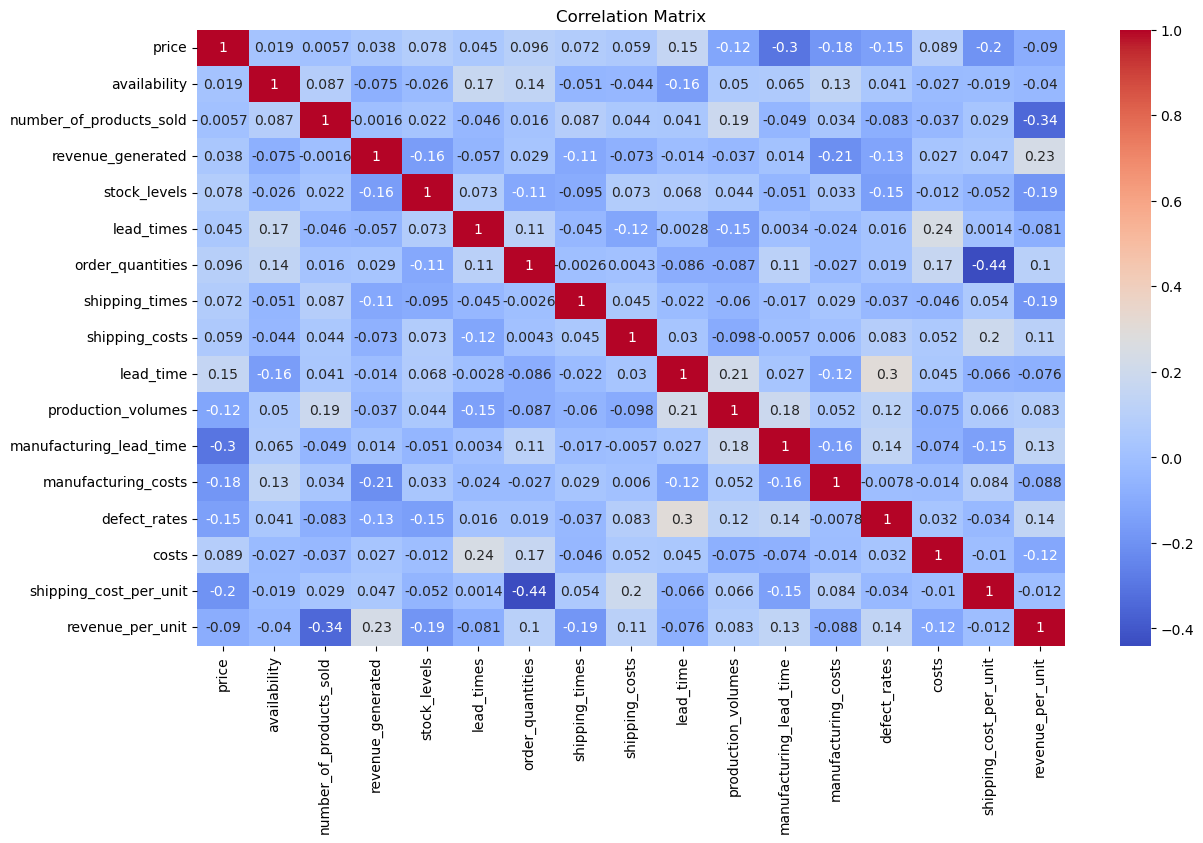

In [9]:
plt.figure(figsize=(14,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()